# Máquina de Turing Não Determinística

### Introdução O quê? Qual a importância?

A máquina de Turing (MT) foi proposta por Alan Turing em 1936. Esta máquina assemelha-se ao autômato finito com a diferença de que a máquina de Turing possui uma mémoria infinita e irrestrita. Para possuir uma memória ilimitada, a MT utiliza uma fita infinita particionada em células na qual pode-se ler e escrever os símbolos. Além disso, a MT possui um cabeçote que pode movimentar-se para à direta e para à esquerda na fita, o que possibilita a escrita e leitura nas células da fita. Neste sentido, pode-se dizer que basicamente a máquina de Turing é composta por:

- Cabeçote;
- Fita de leitura e escrita;
- Registrador para armazenamento do estado atual;
- Função de transições que será responsável por permitir a leitura e escrita na fita, bem como, a movimentação do cabeçote;
- Unidade de controle, que será responsável por realizar as operações necessárias na máquina de Turing.

Por fim, vale destacar que a máquina de Turing possui 3 formas de reconhecimento das palavras, sendo eles: reconhecimento por parada, reconhecimento por estado final e reconhecimento por parada em estado final.

### Projeto e Implementação do Algoritmo

O algoritmo foi implementado na linguagem Python para simular uma Máquina de Turing Não Determinística (MTND) de acordo com o documento informativo fornecido. De acordo com o documento de requisitos, será fornecido pelo usuário os estados, o alfabeto de entrada, o alfabeto da fita, o símbolo que delimita a fita na esquerda, o símbolo que irá representar o caractere branco, o número de transições, o estado inicial, os estados finais e as quíntuplas. Cada quíntupla conteḿ o estado de origem (a), o caractere que será lido (b), o estado de destino (c), o símbolo que será escrito na fita (d) e a direção do cabeçote da fita (e). Sendo assim, serão fornecidas n quíntuplas, sendo n a quantidade de transições e cada quíntupla pode ser representada da seguinte maneira: <a, b, c, d, e>. Tratando-se da direção do cabeçote, este poderia se mover para direita, para esquerda ou ficar imóvel. Neste sentido, durante a implementação do algoritmo foram declaradas as variáveis de acordo com as informações fornecidas e também outras variáveis que julgou-se necessárias para o correto funcionamento do algoritmo. Por fim, destaca-se que, a funcionalidade dicionário da linguagem Python foi utilizada para armazenar as regras de transição da MTND, dado que a mesma gera uma tabela hash, o que facilita no armazenamento e consulta das informações. 

In [ ]:
mtnd = dict()
estados = input().split()
alfEntrada = input().split()
alfFita = input().split()
simbEsquerda = input()
simbBranco = input()
nTransicoes = int(input())

for i in range(nTransicoes):
    origem, carAlf, destino, carFita, direcao = input().split()
    key = (origem, carAlf)
    if key not in mtnd:
        mtnd[key] = []
    mtnd[key].append([destino, carFita, direcao])

estadoInicial = input()
estadosFinais = input().split()
palavras = input().split()

def testaPalavra(palavra):
  fita=list((simbEsquerda+palavra+simbBranco))
  caminho=[(estadoInicial, 1, fita)]
  pValida=False
  
  while True:

    t=caminho.pop()
    estadoAtual=t[0]
    posicao=t[1]
    itensFita=t[2] 
    
    if (estadoAtual,itensFita[posicao]) in mtnd:
      for aux in mtnd[(estadoAtual,itensFita[posicao])]:
        aux2 = []
        for string in itensFita:
          aux2.append(string)
        if aux2[posicao] == simbBranco:
          aux2.append(simbBranco)
          itensFita.append(simbBranco)
        aux2[posicao] = aux[1]
        if aux[2] == 'D':
          caminho.append((aux[0], (posicao + 1), aux2))
        elif aux[2] == 'E': 
          caminho.append((aux[0], (posicao - 1), aux2))
        elif aux[2] == 'I':
          caminho.append((aux[0], posicao, aux2))
    else:
      if (estadoAtual in estadosFinais):
        return not pValida
      if (len(caminho)==0):
        return pValida

for palavra in palavras: 
    if  testaPalavra(palavra):
        print('S')
    else:
        print('N')

Como pode ser visualizado acima, para determinar se uma palavra é aceita ou não pela máquina, foi criada uma função denominada ‘testaPalavra’. Esta por sua vez retorna a variável 'pValida' contendo o valor 'True' ou 'False' e fora desta função realiza-se o tratamento do que deve ser exibido para o usuário de acordo com o retorno recebido da função.

### Metodologia

Inicialmente, os testes foram realizados somente utilizando as palavras fornecidas no documento de requisitos. Na sequência, após a confirmação do funcionamento correto do código, foram utilizadas outras palavras além das fornecidas a fim de validar a implementação realizada e para obter melhores resultados nos testes do tempo de processamento das palavras. 

A linguagem fornecida como exemplo no documento de requisitos é do tipo a^n b^n , sendo assim, além das palavras já informadas, foi desenvolvido um algoritmo simples para gerar palavras para teste neste formato. O código desenvolvido gera as palavras e às armazena em um arquivo do tipo csv.

In [ ]:
import csv

A = []
B = []

with open('palavras.csv', 'w', newline='', encoding='utf-8') as palavras:
  dados_csv = csv.writer(palavras, delimiter=' ')
  for i in range(0,100):
    A.append('a')
    B.append('b')
    dados_csv.writerow(''.join(A+B))  

Objetivando automatizar os testes, o algoritmo da MTND desenvolvido foi alterado. Assim, o algoritmo utilizado durante os testes foi modificado para realizar a leitura dos dados de um arquivo json. Além disso, o algoritmo foi alterado ainda para registrar os tempos. Sendo que, para isto utilizou-se a função time.time() do python. O algoritmo modificado podem ser observado a seguir: 

In [ ]:
import json
import time
import csv

def readData():
  fData = open('data.json')
  data = json.load(fData)
  fData.close()
  return data

data = readData()
mtnd = dict()
estados = data["estados"].split()
alfEntrada = data["alfabeto"].split()
alfFita = data["alfFita"].split()
simbEsquerda = data["simbEsquerda"]
simbBranco = data["simbBranco"]
nTransicoes = int(data["nTransicoes"])

for i in range(nTransicoes):
    origem, carAlf, destino, carFita, direcao = data["quintuplas"][i].split()
    key = (origem, carAlf)
    if key not in mtnd:
        mtnd[key] = []
    mtnd[key].append([destino, carFita, direcao])

estadoInicial = data["estadoInicial"]
estadosFinais = data["estadosFinais"].split()
palavras = data["palavras"].split()

def testaPalavra(palavra):
  fita=list((simbEsquerda+palavra+simbBranco))
  caminho=[(estadoInicial, 1, fita)]
  pValida=False
  
  while True:

    t=caminho.pop()
    estadoAtual=t[0]
    posicao=t[1]
    itensFita=t[2]  
      
    if (estadoAtual,itensFita[posicao]) in mtnd:
      for aux in mtnd[(estadoAtual,itensFita[posicao])]:
        aux2 = []
        for string in itensFita:
          aux2.append(string)     
        if aux2[posicao] == simbBranco:
          aux2.append(simbBranco)
          itensFita.append(simbBranco)
        aux2[posicao] = aux[1]
        if aux[2] == 'D':
          caminho.append((aux[0], (posicao + 1), aux2))
        elif aux[2] == 'E': 
          caminho.append((aux[0], (posicao - 1), aux2))
        elif aux[2] == 'I':
          caminho.append((aux[0], posicao, aux2))
    else:
      if (estadoAtual in estadosFinais):
        return not pValida
      if (len(caminho)==0):
        return pValida

with open('dados.csv', 'w', newline='', encoding='utf-8') as dados:
  dados_csv = csv.writer(dados)
  dados_csv.writerow(['Palavra', 'Tamanho da palava', 'Tempo (s)'])

  for palavra in palavras: 
      tempo = []
      for t in range(0, 100):
          inicio = time.time()
          resultado = testaPalavra(palavra)
          fim = time.time()
          tempo.append((fim - inicio))

      if  resultado:
          print('S')
      else:
          print('N') 
      dados_csv.writerow([palavra, len(palavra), sum(tempo)/len(tempo)])

Todos os arquivos gerados (algoritmos e informações) foram armazenados principalmente de maneira local, após realizar o devido avanço dos itens desenvolvidos os mesmos foram armazenados remotamente no GitHub.

### Resultados e Conclusões

Visando obter melhores resultados durante a realização dos testes, foram utilizadas 100 palavras de tamanhos que variaram entre dois a duzentos caracteres. Vale ressaltar que os tamanhos das palavras variaram de dois em dois e que foram utilizadas somente palavras aceitas pela MTND. Assim, para cada palavra, o tempo de processamento foi armazenado. Sendo que, no que diz respeito a análise do tempo de processamento, cada palavra foi processada 100 vezes e foi realizada a média dos tempos para cada palavra. 

A partir dos dados obtidos e utilizando a ferramenta LibreOffice Calc, obteve-se o seguinte gráfico:

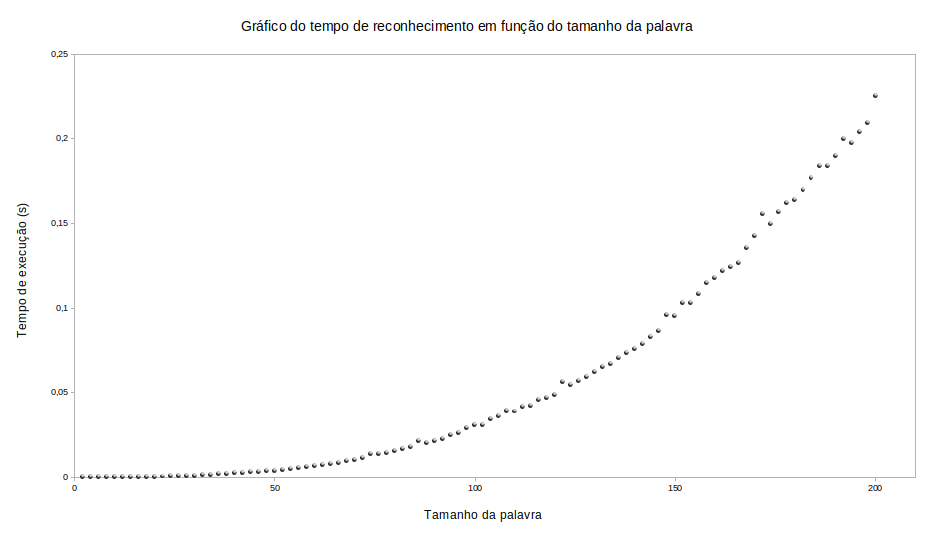

Na sequência, ainda utilizando a mesma ferramenta foi realizada a regressão linear nos dados e o gráfico obtido como resultado foi o seguinte:

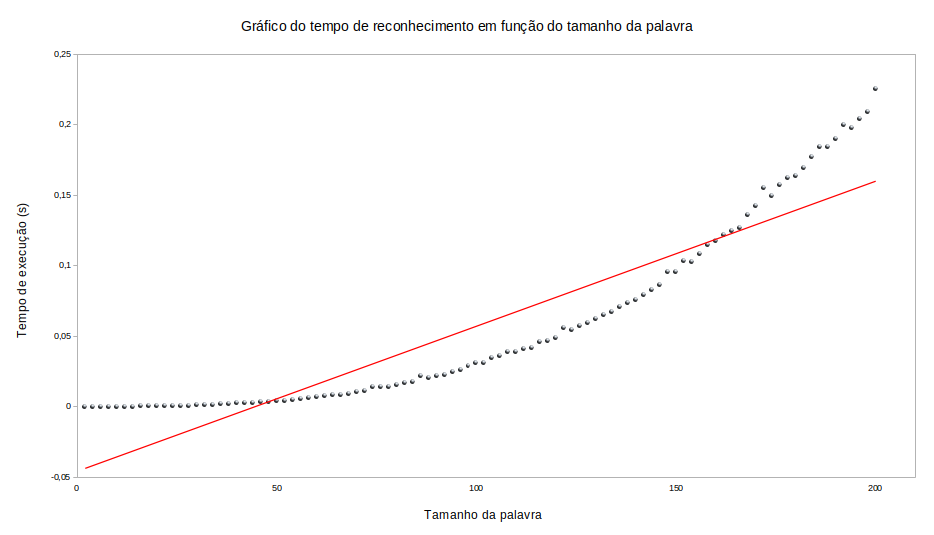

A equação que representa a regressão realiazar é a seguinte:  

f(x) = 0,001x - 0,046

Além disso, obteve-se ainda o valor do coeficiente de determinação múltipla (R²), este valor indica o quão bom é o modelo ajustado. O valor de R² pode variar entre 0 e 1, sendo assim, quanto mais próximo de 1 for o valor de R², melhor é o modelo ajustado. O valor de R² foi: 

R² = 0,85

Assim, percebe-se que a modelagem realizada para a regressão consegue representar bem os dados. 

Por fim, pode-se concluir que a medida que o tamanho da palavra aumenta o tempo de processamento também aumenta. Entretando, vale ressaltar ainda que outros fatores também podem interferir no tempo, como por exemplo: a quantidade de transições que serão realizadas e os passos que a máquina precisa realizar para verificar se reconhece ou não palavra.